In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

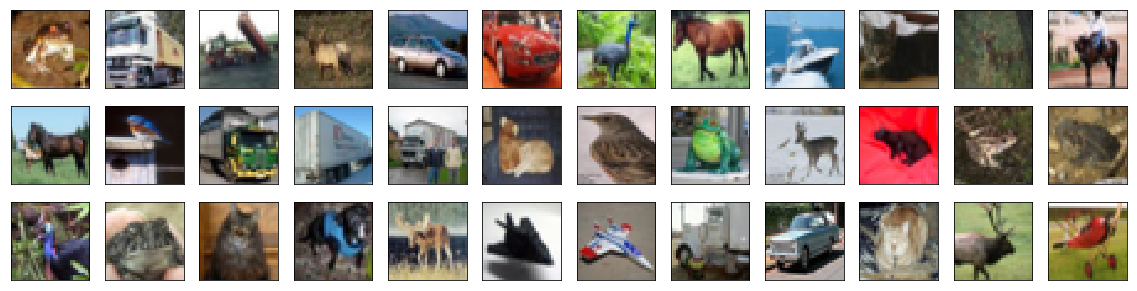

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(20,5))
for i in range(36):
    ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 64)          0         
__________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 75s - loss: 1.5767 - acc: 0.4301 - val_loss: 1.3407 - val_acc: 0.5278

Epoch 00001: val_loss improved from inf to 1.34065, saving model to model.weights.best.hdf5
Epoch 2/100
 - 76s - loss: 1.2595 - acc: 0.5517 - val_loss: 1.1436 - val_acc: 0.6010

Epoch 00002: val_loss improved from 1.34065 to 1.14358, saving model to model.weights.best.hdf5
Epoch 3/100
 - 78s - loss: 1.1268 - acc: 0.6006 - val_loss: 1.0925 - val_acc: 0.6226

Epoch 00003: val_loss improved from 1.14358 to 1.09249, saving model to model.weights.best.hdf5
Epoch 4/100
 - 75s - loss: 1.0461 - acc: 0.6319 - val_loss: 1.0492 - val_acc: 0.6360

Epoch 00004: val_loss improved from 1.09249 to 1.04916, saving model to model.weights.best.hdf5
Epoch 5/100
 - 76s - loss: 0.9863 - acc: 0.6523 - val_loss: 1.0875 - val_acc: 0.6364

Epoch 00005: val_loss did not improve from 1.04916
Epoch 6/100
 - 80s - loss: 0.9501 - acc: 0.6681 - val_loss: 1.0448 - val_acc: 0.6340

Epoc


Epoch 00057: val_loss did not improve from 0.89684
Epoch 58/100
 - 61s - loss: 1.4252 - acc: 0.5264 - val_loss: 1.3651 - val_acc: 0.5146

Epoch 00058: val_loss did not improve from 0.89684
Epoch 59/100
 - 61s - loss: 1.4431 - acc: 0.5223 - val_loss: 1.7801 - val_acc: 0.4984

Epoch 00059: val_loss did not improve from 0.89684
Epoch 60/100
 - 61s - loss: 1.4383 - acc: 0.5251 - val_loss: 1.2315 - val_acc: 0.5820

Epoch 00060: val_loss did not improve from 0.89684
Epoch 61/100
 - 61s - loss: 1.4309 - acc: 0.5224 - val_loss: 1.6846 - val_acc: 0.5270

Epoch 00061: val_loss did not improve from 0.89684
Epoch 62/100
 - 61s - loss: 1.4323 - acc: 0.5217 - val_loss: 1.2063 - val_acc: 0.5910

Epoch 00062: val_loss did not improve from 0.89684
Epoch 63/100
 - 60s - loss: 1.4420 - acc: 0.5187 - val_loss: 1.3470 - val_acc: 0.5112

Epoch 00063: val_loss did not improve from 0.89684
Epoch 64/100
 - 60s - loss: 1.4266 - acc: 0.5207 - val_loss: 1.2929 - val_acc: 0.5394

Epoch 00064: val_loss did not imp

In [13]:
model.load_weights('model.weights.best.hdf5')

In [14]:
score=model.evaluate(x_test,y_test,verbose=1)
print('#n','test accuracy:',score[1])

10000/10000 [==============================] - 5s 460us/step
#n test accuracy: 0.6853


In [15]:
y_hat=model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

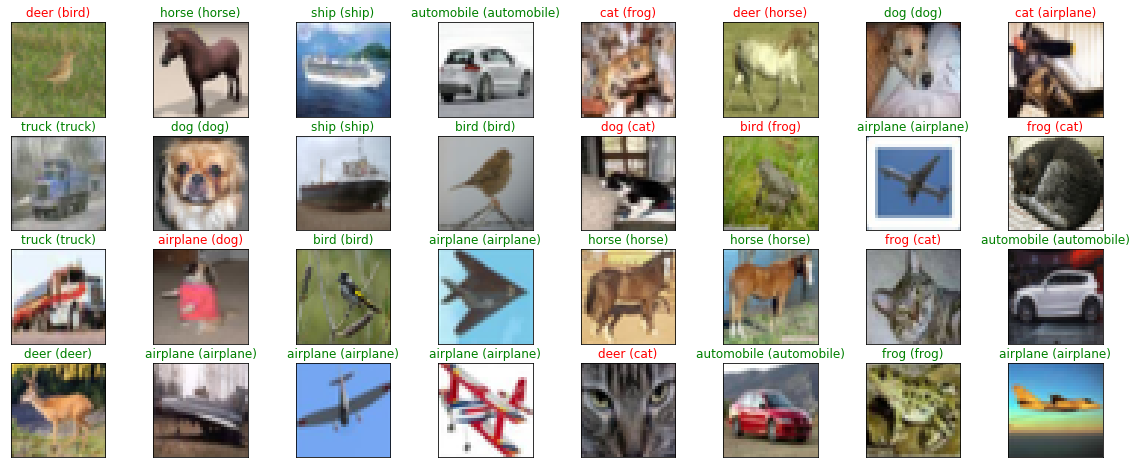

In [16]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))